In [ ]:
pip install -u pandas-datareader

In [ ]:
pip install statsmodels 

In [12]:
# import librarys
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os
import time
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
plt.style.use('seaborn')

## Getting Data from Yahoo Finance

In [2]:
#get Microsoft stock price
msftdf = web.DataReader('msft', data_source='yahoo', start='2018-05-01', end='2021-05-01')

msftdf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-05-01,95.290001,92.790001,93.209999,95.000000,31408900.0,91.275635
2018-05-02,95.169998,93.190002,94.989998,93.510002,27471000.0,89.844063
2018-05-03,94.930000,92.449997,92.959999,94.070000,31142500.0,90.382095
2018-05-04,95.370003,92.919998,93.320000,95.160004,22531300.0,91.429367
2018-05-07,96.709999,95.099998,95.169998,96.220001,24242000.0,92.447807
...,...,...,...,...,...,...
2021-04-26,262.440002,260.170013,261.660004,261.549988,19763300.0,261.549988
2021-04-27,263.190002,260.119995,261.579987,261.970001,31014200.0,261.970001
2021-04-28,256.540009,252.949997,256.079987,254.559998,46903100.0,254.559998


In [37]:
#get Facebook stock price
fbdf = web.DataReader('FB', data_source='yahoo', start='2018-05-01', end='2021-05-01')

fbdf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-05-01,174.020004,170.229996,172.000000,173.860001,26025900,173.860001
2018-05-02,178.080002,174.199997,174.250000,176.070007,30424500,176.070007
2018-05-03,176.119995,172.119995,175.130005,174.020004,24026100,174.020004
2018-05-04,176.979996,173.059998,173.080002,176.610001,17677800,176.610001
2018-05-07,179.500000,177.169998,177.350006,177.970001,18697200,177.970001
...,...,...,...,...,...,...
2021-04-26,305.799988,301.559998,303.339996,303.040009,16172600,303.040009
2021-04-27,305.339996,301.109985,304.279999,303.570007,15309300,303.570007
2021-04-28,310.920013,305.369995,307.359985,307.100006,33907200,307.100006


In [38]:
#get Apple stock price
aapldf = web.DataReader('AAPL', data_source='yahoo', start='2018-05-01', end='2021-05-01')

aapldf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-05-01,42.299999,41.317501,41.602501,42.275002,214277600.0,40.717613
2018-05-02,44.437500,43.450001,43.807499,44.142502,266157600.0,42.516315
2018-05-03,44.375000,43.610001,43.970001,44.222500,136272800.0,42.593361
2018-05-04,46.062500,44.542500,44.562500,45.957500,224805200.0,44.264439
2018-05-07,46.917500,46.187500,46.294998,46.290001,169805600.0,44.584698
...,...,...,...,...,...,...
2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.491562
2021-04-27,135.410004,134.110001,135.009995,134.389999,66015800.0,134.162109
2021-04-28,135.020004,133.080002,134.309998,133.580002,107760100.0,133.353485


In [40]:
#get Google stock price
googdf = web.DataReader('GOOGL', data_source='yahoo', start='2018-05-01', end='2021-05-01')

googdf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-05-01,1041.729980,1010.609985,1016.299988,1040.750000,1766300,1040.750000
2018-05-02,1043.979980,1023.159973,1034.000000,1026.050049,1734900,1026.050049
2018-05-03,1030.689941,1007.890015,1025.369995,1026.300049,1964100,1026.300049
2018-05-04,1051.880005,1018.049988,1019.609985,1051.000000,1844600,1051.000000
2018-05-07,1065.000000,1050.270020,1053.890015,1059.459961,1720000,1059.459961
...,...,...,...,...,...,...
2021-04-26,2324.530029,2297.320068,2304.520020,2309.929932,1601900,2309.929932
2021-04-27,2318.449951,2286.159912,2317.629883,2290.979980,2219300,2290.979980
2021-04-28,2431.379883,2353.219971,2392.500000,2359.040039,4055300,2359.040039


In [42]:
#get Amazon stock price
amzndf = web.DataReader('AMZN', data_source='yahoo', start='2018-05-01', end='2021-05-01')

amzndf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-05-01,1585.000000,1552.180054,1563.219971,1582.260010,4572100,1582.260010
2018-05-02,1588.500000,1566.359985,1580.979980,1569.680054,4360300,1569.680054
2018-05-03,1574.800049,1546.020020,1560.010010,1572.079956,4251900,1572.079956
2018-05-04,1584.900024,1562.189941,1562.449951,1580.949951,3443600,1580.949951
2018-05-07,1606.949951,1587.829956,1589.339966,1600.140015,3801900,1600.140015
...,...,...,...,...,...,...
2021-04-26,3428.449951,3330.939941,3348.000000,3409.000000,4880700,3409.000000
2021-04-27,3460.000000,3398.010010,3443.469971,3417.429932,3827100,3417.429932
2021-04-28,3489.879883,3425.000000,3434.800049,3458.500000,4631900,3458.500000


## Visualizing the Data

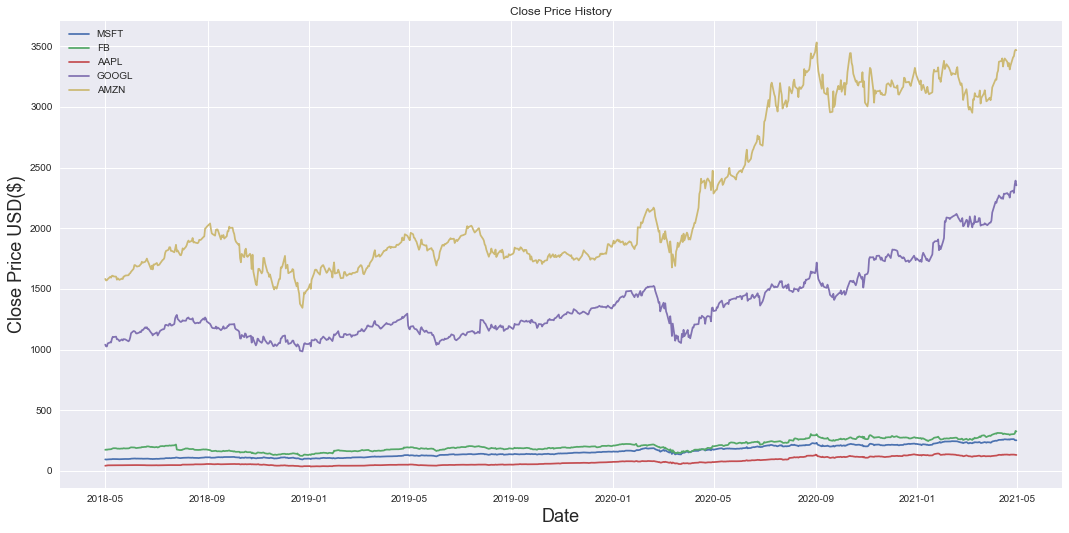

In [43]:
#plot close prices
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(msftdf['Close'], label='MSFT')
plt.plot(fbdf['Close'], label='FB')
plt.plot(aapldf['Close'], label='AAPL')
plt.plot(googdf['Close'], label='GOOGL')
plt.plot(amzndf['Close'], label='AMZN')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.legend()

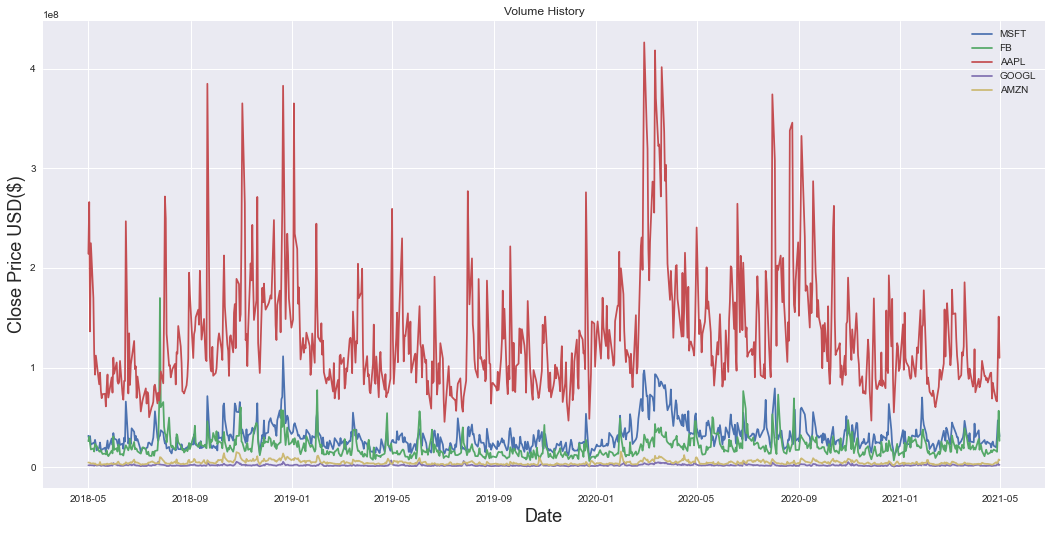

In [45]:
plt.figure(figsize=(16,8))
plt.title('Volume History')
plt.plot(msftdf['Volume'], label='MSFT')
plt.plot(fbdf['Volume'], label='FB')
plt.plot(aapldf['Volume'], label='AAPL')
plt.plot(googdf['Volume'], label='GOOGL')
plt.plot(amzndf['Volume'], label='AMZN')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.legend()

In [ ]:
#creating new column = 'Total Traded' which is close price * volume 

In [46]:
msftdf['Total Traded'] = msftdf['Close']*msftdf['Volume']
fbdf['Total Traded'] = fbdf['Close']*fbdf['Volume']
aapldf['Total Traded'] = aapldf['Close']*aapldf['Volume']
amzndf['Total Traded'] = amzndf['Close']*amzndf['Volume']
googdf['Total Traded'] = googdf['Close']*googdf['Volume']

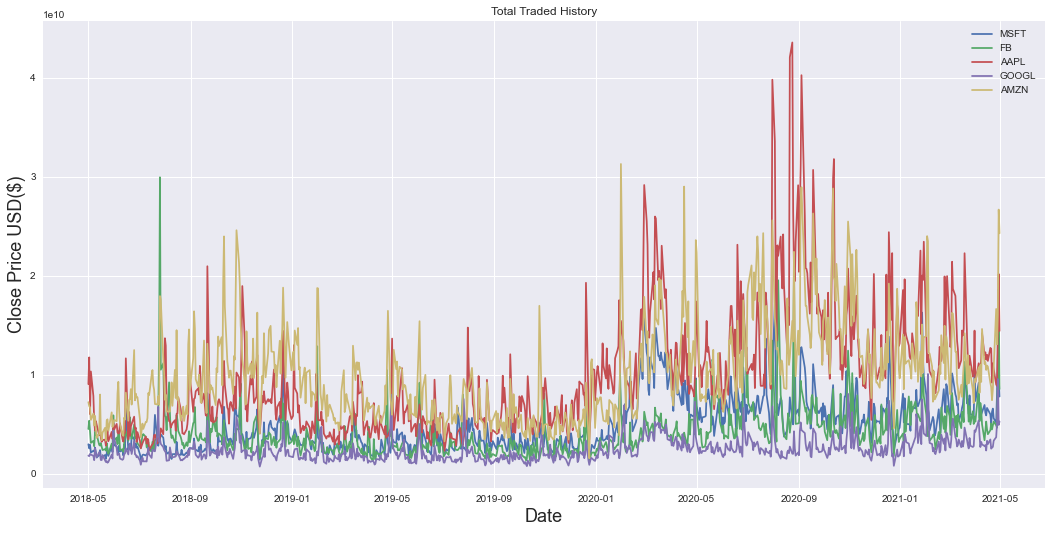

In [47]:
plt.figure(figsize=(16,8))
plt.title('Total Traded History')
plt.plot(msftdf['Total Traded'], label='MSFT')
plt.plot(fbdf['Total Traded'], label='FB')
plt.plot(aapldf['Total Traded'], label='AAPL')
plt.plot(googdf['Total Traded'], label='GOOGL')
plt.plot(amzndf['Total Traded'], label='AMZN')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.legend()

## Getting started with ARIMA

##### First ARIMA model without splitting data

In [17]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [48]:
#check length of df
len(msftdf)

756

In [49]:
#making arima model with pdq as 1,1,1 without fitting data

model = ARIMA(msftdf['Close'].fillna(value=msftdf['Close'].mean()),order=(1,1,1))
model_fit= model.fit()
model_fit.params
result= model.fit(disp=False)

C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but 

In [50]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  755
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1930.624
Method:                       css-mle   S.D. of innovations              3.121
Date:                Fri, 14 May 2021   AIC                           3869.248
Time:                        21:23:51   BIC                           3887.755
Sample:                             1   HQIC                          3876.377
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2088      0.090      2.314      0.021       0.032       0.386
ar.L1.D.Close    -0.3159      0.110     -2.877      0.004      -0.531      -0.101
ma.L1.D.Close     0.0451      0.114      0.395      0.693      -0.179       0.269
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.1652           +0.0000j            3.1652            0.5000
MA.1          -22.1853           +0.0000j           22.1853            0.5000
-----------------------------------------------------------------------------
"""

In [51]:
#use ARIMA predict function to apply predictions to variable = y_predict
y_predict = model_fit.predict(typ='levels')
print(y_predict)

Date
2018-05-02     95.208776
2018-05-03     94.184685
2018-05-04     94.162642
2018-05-07     95.135321
2018-05-08     96.208735
                 ...    
2021-04-26    260.291927
2021-04-27    261.755057
2021-04-28    262.121727
2021-04-29    256.835000
2021-04-30    253.237458
Length: 755, dtype: float64


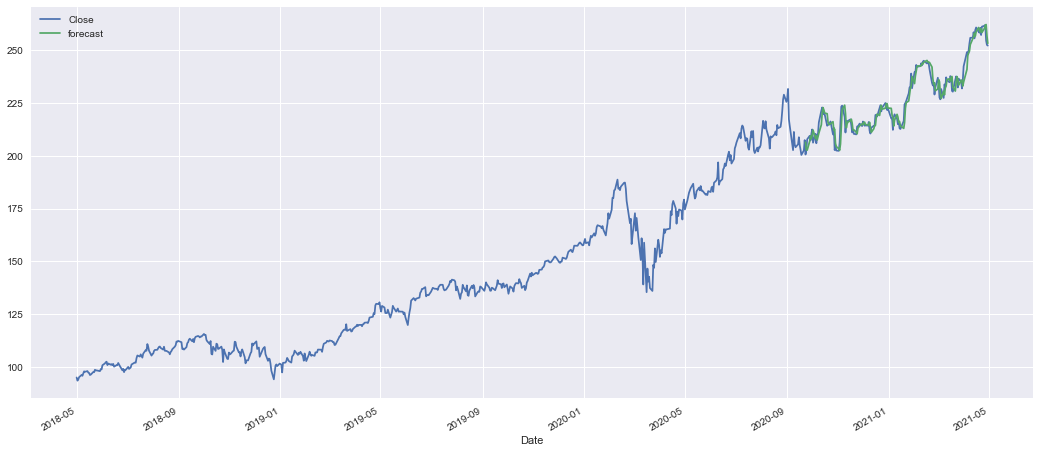

In [52]:
msftdf['forecast']= model_fit.predict(start=604,typ='levels')
msftdf[['Close', 'forecast']].plot(figsize=(16,8))
plt.show()

In [132]:
#check MSE score
mean_squared_error(msftdf['Close'][1:len(msftdf)],y_predict)


9.74041638555085

In [135]:
#double check MSE score

nosplit_mse = mse(y_predict, msftdf[1:756])

mse(y_predict, msftdf[1:756])


9.74041638555085

###### ARIMA with split of y_train and y_test 

In [90]:
#get close data alone

msftdf = msftdf[['Close']].copy()
msftdf.info

<bound method DataFrame.info of                  Close
Date                  
2018-05-01   95.000000
2018-05-02   93.510002
2018-05-03   94.070000
2018-05-04   95.160004
2018-05-07   96.220001
...                ...
2021-04-26  261.549988
2021-04-27  261.970001
2021-04-28  254.559998
2021-04-29  252.509995
2021-04-30  252.179993

[756 rows x 1 columns]>

In [92]:
#split data into test and split at .80 (of )
y_train = msftdf.iloc[:604]
y_test = msftdf.iloc[604:]

<bound method DataFrame.info of                  Close
Date                  
2018-05-01   95.000000
2018-05-02   93.510002
2018-05-03   94.070000
2018-05-04   95.160004
2018-05-07   96.220001
...                ...
2020-09-16  205.050003
2020-09-17  202.910004
2020-09-18  200.389999
2020-09-21  202.539993
2020-09-22  207.419998

[604 rows x 1 columns]>

In [95]:
y_train.tail()

,Close
Date,
2020-09-16,205.050003
2020-09-17,202.910004
2020-09-18,200.389999
2020-09-21,202.539993
2020-09-22,207.419998


In [96]:
y_test.head()

,Close
Date,
2020-09-23,200.589996
2020-09-24,203.190002
2020-09-25,207.820007
2020-09-28,209.440002
2020-09-29,207.259995


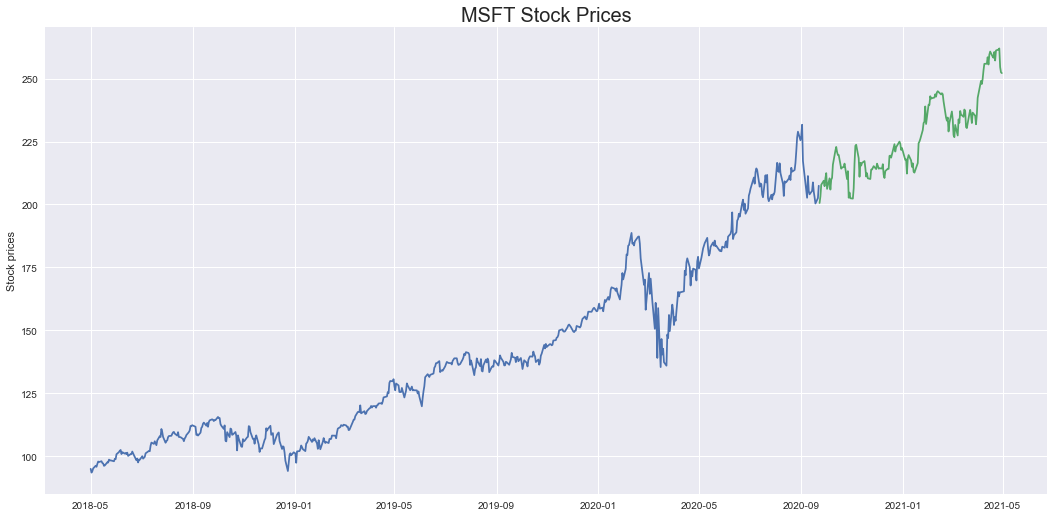

In [91]:
#plot train and test
plt.figure(figsize=(16,8))
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Actual')
plt.ylabel("Stock prices")
plt.title('MSFT Stock Prices',fontsize=20)
plt.show()

In [65]:
print("start:",y_test.index.min())
print("end:",y_test.index.max())

start: 2020-09-23 00:00:00
end: 2021-04-30 00:00:00


In [66]:
y_test.shape

(152, 1)

In [67]:
y_train.shape

(604, 1)

In [107]:
arima = ARIMA(y_train,order=(1,1,1)).fit(disp=False)
y_arima = arima.predict(604,755,typ='levels')
y_arima.index = y_test.index

C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but 

134.26755834668572

In [129]:
#Check MSE of model
mse(y_arima,y_test)

arima_mse = mse(y_arima,y_test)

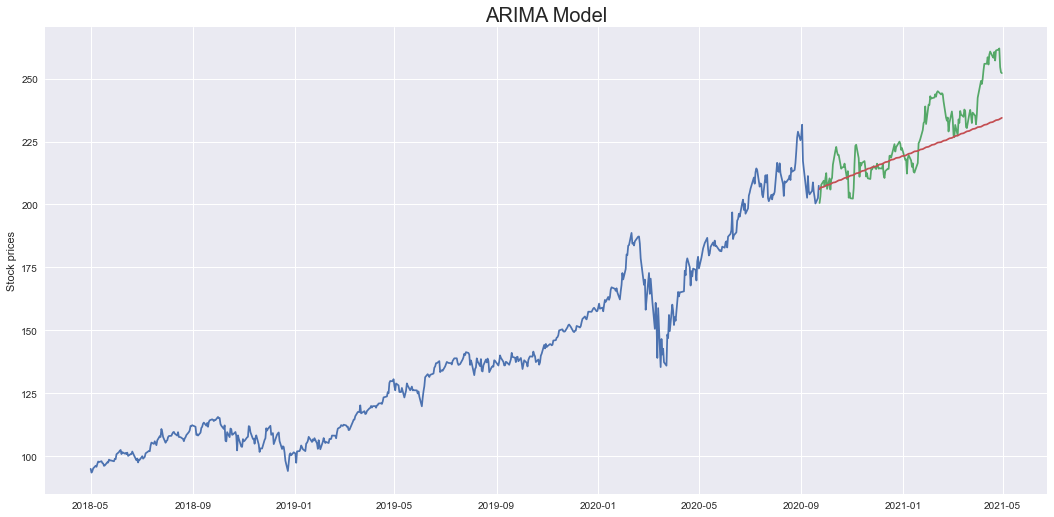

In [121]:
#Plot ARIMA model

plt.figure(figsize=(16,8))
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Actual')
plt.plot(y_arima,label='ARIMA Predict')
plt.ylabel("Stock prices")
plt.title('ARIMA Model',fontsize=20)
plt.show()

## Checking ARMA Model

In [117]:
from statsmodels.tsa.arima_model import ARMA

In [119]:
arma = ARMA(y_train,order=(1,1)).fit()
y_arma =arma.predict(604,755)
y_arma.index = y_test.index

C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but 

955.3738272269657

In [128]:
#Check MSE of model
mse(y_arma,y_test)

arma_mse = mse(y_arma,y_test)

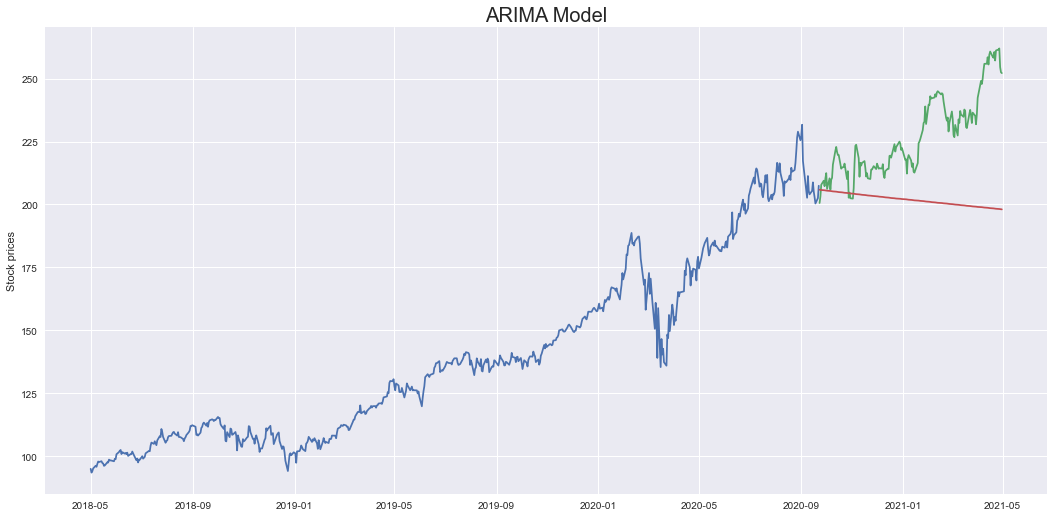

In [122]:
plt.figure(figsize=(16,8))
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Actual')
plt.plot(y_arma,label='ARIMA Predict')
plt.ylabel("Stock prices")
plt.title('ARIMA Model',fontsize=20)
plt.show()

### Visualize results

In [138]:
import pandas as PD

In [140]:
mse_df = DataFrame[nosplit_mse, arima_mse, arma_mse]

mse_df.head()

NameError: name 'DataFrame' is not defined

In [142]:
mse_df = Dataframe({'Model':['No Split', 'Arima', 'ARMA'],
                    'MSE Score':[nosplit_mse, arima_mse, arma_mse]})
                   
mse_df

NameError: name 'Dataframe' is not defined